In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups

! git clone https://stephanieli333:colonp:P00oo@github.com/stephanieli333/comp551a2.git

print("loading")
reviews_train = load_files("comp551a2/aclImdb/train")
reviews_test = load_files("comp551a2/aclImdb/test")
print("setting")
X_train, y_train = reviews_train.data, reviews_train.target
X_test, y_test = reviews_test.data, reviews_test.target
print("replacing")
X_train = [doc.replace(b"<br />", b" ") for doc in X_train]
X_test = [doc.replace(b"<br />", b" ") for doc in X_test]

print("vectorizing")
vectorizer = TfidfVectorizer(min_df=5, norm='l2').fit(X_train)
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

Cloning into 'comp551a2'...
remote: Enumerating objects: 50, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 49684 (delta 27), reused 38 (delta 17), pack-reused 49634
Receiving objects: 100% (49684/49684), 60.96 MiB | 10.40 MiB/s, done.
Resolving deltas: 100% (39/39), done.
Checking out files: 100% (146493/146493), done.
loading
setting
replacing
vectorizing


In [0]:
git clone 

1401


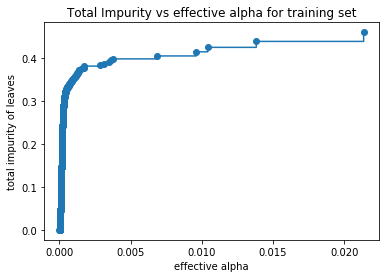

In [0]:
criterion = 'gini'

clf = DecisionTreeClassifier(random_state=0, criterion=criterion)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(len(ccp_alphas))
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [0]:
clfs = []
for i in range (0, len(ccp_alphas), 100):
    print("Fitting ccp_alpha = ", ccp_alphas[i])
    ccp_alpha = ccp_alphas[i]
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha, criterion=criterion)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Done fitting to all ccp_alphas")

Fitting ccp_alpha =  0.0
Fitting ccp_alpha =  6e-05
Fitting ccp_alpha =  6.399999999999998e-05
Fitting ccp_alpha =  7.200000000000002e-05
Fitting ccp_alpha =  7.78666666666667e-05
Fitting ccp_alpha =  0.00010245614035087705
Fitting ccp_alpha =  0.000125
Fitting ccp_alpha =  0.00013866666666666669
Fitting ccp_alpha =  0.0001496677543146795
Fitting ccp_alpha =  0.0001659428571428572
Fitting ccp_alpha =  0.00018765940165154998
Fitting ccp_alpha =  0.00021230769230769233
Fitting ccp_alpha =  0.00025519644912049954
Fitting ccp_alpha =  0.0003538010214504596
Fitting ccp_alpha =  0.03940785302871147
Done fitting to all ccp_alphas


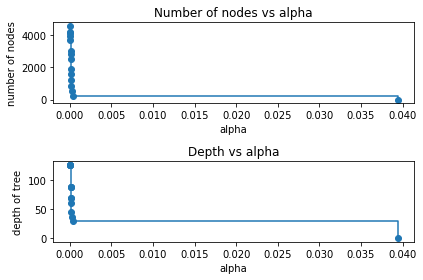

In [0]:
ccp_alphas = ccp_alphas[::100]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

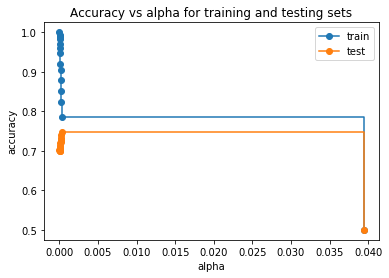

In [0]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

don't need to run this

In [0]:
clfspec = []
for i in range(1300, 1401, 20):
    print("Fitting ccp_alpha = ", ccp_alphas[i])
    ccp_alpha = ccp_alphas[i]
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfspec.append(clf)
print("Done fitting to all ccp_alphas")

Fitting ccp_alpha =  0.0003538010214504596
Fitting ccp_alpha =  0.000410873786407767
Fitting ccp_alpha =  0.0005262131868515453
Fitting ccp_alpha =  0.0008390146179588637
Fitting ccp_alpha =  0.0013371294775200507
Fitting ccp_alpha =  0.03940785302871147
Done fitting to all ccp_alphas


don't neet to run this

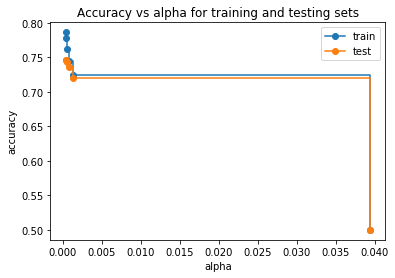

In [0]:
train_scores = [clf.score(X_train, y_train) for clf in clfspec]
test_scores = [clf.score(X_test, y_test) for clf in clfspec]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas[1300::20], train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas[1300::20], test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

set alpha to best alpha and then run

In [3]:
alpha = 0.0003538010214504596
criterion = "gini"

optmodel = DecisionTreeClassifier(random_state=0, ccp_alpha=alpha, criterion=criterion)
optmodel.fit(X_train, y_train)
print(optmodel.get_depth())

depthmodel = DecisionTreeClassifier(random_state=0, max_depth=optmodel.get_depth(), criterion=criterion)
depthmodel.fit(X_train, y_train)

models = [optmodel, depthmodel]

train_scores = [clf.score(X_train, y_train) for clf in models]
test_scores = [clf.score(X_test, y_test) for clf in models]

print("opt train score = ", train_scores[0])
print("depth train score = ", train_scores[1])
print("opt test score = ", test_scores[0])
print("depth test score = ", test_scores[1])


29
opt train score =  0.78628
depth train score =  0.93832
opt test score =  0.74664
depth test score =  0.7148


In [0]:
print(optmodel.get_depth())

29


In [0]:
optmodel = DecisionTreeClassifier(random_state=0)
optmodel.fit(X_train, y_train)
print(optmodel.score(X_test, y_test))
print(optmodel.get_depth())

0.70296
127


In [0]:
optmodel = DecisionTreeClassifier(random_state=0, criterion='entropy')
optmodel.fit(X_train, y_train)
print(optmodel.score(X_test, y_test))
print(optmodel.get_depth())

0.70864
91
